# Einstein Field Equations
## Carter Rhea
### Spring 2018

# Goal
The purpose of this jupyter notebook is ''simple'': Create a module which calculates the form of the solution equations derived from solving the Einstein Field Equations given some for the Metric Tensor, $g_{\mu\nu}$, and Energy-Momentum Tensor, $T_{\mu\nu}$.

In addition to our primary goal, this notebook will serve as a review of certain critical notions in General Relativity. This was constructed out of review of "A Gentle Introduction to General Relativity" (excellent book) in preperation of continued graduate studies in Astrophysics

Assuming that we are given the Metric Tensor and Energy-Momentum Tensor, we can go about solving the Field Equations by filling in the blanks! Let's take a look at EFQ (Einstein Field Equations):
$$R_{\mu\nu} - \frac{1}{2}Rg_{\mu\nu} + \Lambda g_{\mu\nu}= T_{\mu\nu}$$

While we have already introduced $g_{\mu\nu}$ (A tensor describing the curvature of space which is notoriously difficult to solve for), we have yet to define the Ricci Tensor, $R_{\mu\nu}$, or Ricci Scalar, $R$.

$$R_{\alpha,\beta} = \partial_\rho\Gamma^\rho_{\beta\alpha}-\partial_\beta\Gamma^\rho_{\rho\alpha}+\Gamma^\rho_{\rho\lambda}\Gamma^\lambda_{\beta\alpha}-\Gamma^\rho_{\beta\lambda}\Gamma^\lambda_{\rho\alpha}$$

$$R = g^{\alpha\beta}R_{\alpha\beta}$$

And we must clearly define $\Gamma^i_{jk}$ which is the Christoffel Symbol of the Second Kind. $\Gamma$ describes the curvature of the basis functions for a space (in free terms).
$$\Gamma^i_{kl} = \frac{1}{2}g^{im}(g_{mk,l}+g_{ml,k}-g_{kl,m}) $$

where $g^{im}=[g_{im}]^{-1}$

In [1]:
from sympy import *
init_printing()
from sympy.abc import a,b,c,d,t,r,theta,phi,pi,G
Rs = Symbol('Rs')
def numtosym(num):
    if num == 0:
        return t
    elif num == 1:
        return r
    elif num == 2:
        return theta
    elif num == 3:
        return phi
    elif num==t or num==r or num==theta or num==phi:
        return num
    else:
        print("Please enter valid number: 0, 1, 2, 3")
        return num
        

def symtonum(sym):
    if sym == t:
        return 0
    elif sym == r:
        return 1
    elif sym == theta:
        return 2
    elif sym == phi:
        return 3
    elif sym==0 or sym==1 or sym==2 or sym==3:
        return sym
    else:
        print("Please enter a valid symbol: t, r, theta, phi")
        return sym
        

In [2]:
#Define variables of interest
variables = [t,r,theta,phi]
#Define function for metric tensor... (Assuming diagonal)
#a - dt^2 constant
#b - dr^2 constant
#c - dtheta^2 constant
#d - dphi^2 constant
def MetTen(a,b,c,d):
    g = Array([[a,0,0,0],[0,b,0,0],[0,0,c,0],[0,0,0,d]])
    return g
#Define differentiation of metric tensor for calculation of Christoffel Sybol
#i - row for metric tensor
#j - col for metric tensor
#k - derivative wrt k
def MTdiff(g,i,j,k):
    k = numtosym(k)
    i = symtonum(i)
    j = symtonum(j)
    return diff(g[i,j],k)
#Define inverse metric tensor
def MTinv(g):
    g0inv = simplify(1/g[0,0])
    g1inv = simplify(1/g[1,1])
    g2inv = simplify(1/g[2,2])
    g3inv = simplify(1/g[3,3])
    return MetTen(g0inv,g1inv,g2inv,g3inv)

As an example let us examine the minkowski metric, $\eta_{\mu\nu}$ which simply has $1$ on the diagonal and the chosen sign convention $(+ - - -)$. 

In [3]:
Minkow = MetTen(1,1,1,1)
print(Minkow)
for i in range(4):
    for j in range(4):
        for k in range(4): 
            print(MTdiff(Minkow,i,j,k),end=' ')

[[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]]
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

We clearly see that our differentiation is behaving as we hoped it would!

In [4]:
#Define Christoffel Symbol
#i - upper index
#k - lower index one
#l - lower index two
def Christoffel(g,i,k,l):
    expr = 0
    i = symtonum(i)
    for m in range(4):
        expr += 0.5*MTinv(g)[i,m]*(MTdiff(g,m,k,l)+MTdiff(g,m,l,k)-MTdiff(g,k,l,m))
    return expr
#Gamma - Christoffel Symbol
#rho - derivative wrt rho
def ChristoffelDiff(Gamma,rho):
    rho = numtosym(rho)
    return diff(Gamma,rho)

In [5]:
#Define Ricci Tensor
#alpha - lower index one
#beta - lower index two
def Ricci(g,alpha,beta):
    final_ric = 0
    for rho in range(4):
        p1 = ChristoffelDiff(Christoffel(g,rho,alpha,beta),rho)
        p2 = -ChristoffelDiff(Christoffel(g,rho,alpha,rho),beta)
        p3 = 0
        p4 = 0
        for lam in range(4):
            p3 += Christoffel(g,rho,lam,rho)*Christoffel(g,lam,alpha,beta)
            p4 -= Christoffel(g,rho,lam,beta)*Christoffel(g,lam,alpha,rho)
        final_ric += p1+p2+p3+p4
    return final_ric
def RicciConst(g):
    Rc = 0
    for i in range(4):
        Rc += MTinv(g)[i,i]*Ricci(g,i,i)
    return simplify(Rc) 

In [6]:
Ricci(Minkow,t,t)

We now need to consider how we will handle the energy-momentum tensor:

$\textit{DUST:}$
$$T^{\mu}_\nu = diag\{\rho,0,0,0\} $$

$\textit{PERFECT FLUID:}$
$$T^{\mu}_\nu = diag\{\rho,-P,-P,-P\} $$

where $\rho$ is mass density and $P$ is pressure.

We now are interested in solving the field equations given a metrc and certain situation; Let us start by solving for our differential equations using the Schwarzchild Metric which assumes $T^{\mu\nu} := \textbf{0}$.

In [7]:
from sympy import sin
MetSchwartz = Matrix([[1-Rs/r,0,0,0],[0,-(1-Rs/r)**(-1),0,0],[0,0,-r**2,0],[0,0,0,-r**2*sin(theta)**2]])

In [8]:
#Let us print out the equations calculated from the diagonal since they are the only nonzero options!
for i in range(4):
    eqn = Ricci(MetSchwartz,i,i)-(1/2)*(MetSchwartz[i,i]*RicciConst(MetSchwartz))
    print(eqn)

0.25*Rs**2*(Rs - r)/(r**4*(-Rs + r)) - 0.25*Rs**2*(Rs - r)**2/(r**6*(-Rs/r + 1)**2) + 0.5*Rs/r**3 + 0.5*Rs*(Rs - r)/r**4
-0.25*Rs**2/(r**2*(-Rs + r)**2) + 0.25*Rs**2*(Rs - r)/(r**4*(-Rs + r)*(-Rs/r + 1)**2) + 0.5*Rs/(r*(-Rs + r)**2) + 0.5*Rs/(r**2*(-Rs + r)) + 1.0*Rs*(Rs - r)/(r**4*(-Rs/r + 1)**2)
0.5*Rs*(1.0*Rs - 1.0*r)/(r*(-Rs + r)) + 0.5*Rs*(Rs - r)*(1.0*Rs - 1.0*r)/(r**3*(-Rs/r + 1)**2)
0.5*Rs*(Rs - r)*sin(theta)**2/(r*(-Rs + r)) + 0.5*Rs*(Rs - r)**2*sin(theta)**2/(r**3*(-Rs/r + 1)**2)


Equally we should be able to solve for the famed Friemann equation

In [9]:
ac = Function('ac')(t)
pr = Symbol('pr')
rho = Symbol('rho')
MetFried = Matrix([[1,0,0,0],[0,-ac**2,0,0],[0,0,-ac**2,0],[0,0,0,-ac**2]])
T_pf = -8*pi*G*Matrix([[rho,0,0,0],[0,-pr,0,0],[0,0,-pr,0],[0,0,0,-pr]])

In [10]:
for i in range(4):
    print(Ricci(MetFried,i,i))

-3.0*Derivative(ac(t), t, t)/ac(t)
1.0*ac(t)*Derivative(ac(t), t, t) + 2.0*Derivative(ac(t), t)**2
1.0*ac(t)*Derivative(ac(t), t, t) + 2.0*Derivative(ac(t), t)**2
1.0*ac(t)*Derivative(ac(t), t, t) + 2.0*Derivative(ac(t), t)**2


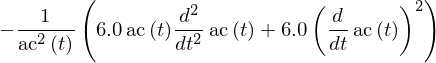

In [11]:
RicciConst(MetFried)

In [12]:
#And let's not be totally lazy...

def FieldEqn(g,T,mu,nu):
    equation = Ricci(g,mu,nu)-(1/2)*(g[mu,nu]*RicciConst(g))-T[mu,nu]
    return simplify(equation)

In [13]:
print(FieldEqn(MetFried,T_pf,0,0))

8*G*pi*rho + 3.0*Derivative(ac(t), t)**2/ac(t)**2


We really should include a quick calculation of $K$ which indicates which space we live in...

$$ K = 0 \ \rightarrow{} \ \text{Minkowski Space}$$
$$ K > 0 \ \rightarrow{} \ \text{de Sitter Space}$$
$$ K < 0 \ \rightarrow{} \ \text{anti-de Sitter Space}$$

In [14]:
def k_calc(g,n):
    #n is the spatial dimension number
    K = RicciConst(g)/(n*(n-1))
    return K

In [15]:
print(k_calc(MetFried,4))

-(6.0*ac(t)*Derivative(ac(t), t, t) + 6.0*Derivative(ac(t), t)**2)/(12*ac(t)**2)
